## DATS 6103 - Individual Project 3 - Hao Ning 
## Global Scientific Research Analysis: 
## Scientific Articles Publication and Research Expenditure

### Introduction
Science and technology are virtually the driving forces that promote the life quality of people and economic growth of a nation.  
A detailed analysis on scientific research and expenditure would greatly help us to grasp the latest trend in the world.  


### Import packages and data

In [1]:
# import packages
import pandas as pd
import numpy as np
! pip install pycountry
import pycountry
import matplotlib.pyplot as plt
from IPython.display import display
import plotly
import plotly.plotly as py

In [2]:
# plotly sign in
py.sign_in('hning','GVxogtPePwFcvSnJk20b')
print(plotly.__version__)
plotly.offline.init_notebook_mode()


3.6.1


In [3]:
# Import data set of scientific journal articles
# Research and development expenditure (% of GDP)
# GDP ($)
Sci = pd.read_csv('API_IP.JRN.ARTC.SC_DS2_en_csv_v2_10522715.csv', skiprows = 4)
ExpPercent = pd.read_csv('API_GB.XPD.RSDV.GD.ZS_DS2_en_csv_v2_10515258.csv', skiprows = 4)
GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10515210.csv', skiprows = 4)
display(Sci.head())
display(ExpPercent.head())
display(GDP.head())

Country Name Country Code                             Indicator Name  \
0        Aruba          ABW  Scientific and technical journal articles   
1  Afghanistan          AFG  Scientific and technical journal articles   
2       Angola          AGO  Scientific and technical journal articles   
3      Albania          ALB  Scientific and technical journal articles   
4      Andorra          AND  Scientific and technical journal articles   

   Indicator Code  1960  1961  1962  1963  1964  1965     ...        2010  \
0  IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN     ...         NaN   
1  IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN     ...        33.9   
2  IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN     ...        15.2   
3  IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN     ...       140.8   
4  IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN     ...         1.2   

    2011   2012   2013   2014   2015   2016  2017  2018  Unnamed: 63  
0    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN          NaN  
1   42.7   35.0   27.3   33.3   23.5   80.4   NaN   NaN          NaN  
2   17.8   22.4   24.1   35.7   32.9   39.1   NaN   NaN          NaN  
3  165.2  214.1  359.5  360.7  269.0  191.4   NaN   NaN          NaN  
4    1.0    3.6    5.9    5.4    7.4    7.9   NaN   NaN          NaN  

[5 rows x 64 columns]

Country Name Country Code                                   Indicator Name  \
0        Aruba          ABW  Research and development expenditure (% of GDP)   
1  Afghanistan          AFG  Research and development expenditure (% of GDP)   
2       Angola          AGO  Research and development expenditure (% of GDP)   
3      Albania          ALB  Research and development expenditure (% of GDP)   
4      Andorra          AND  Research and development expenditure (% of GDP)   

      Indicator Code  1960  1961  1962  1963  1964  1965     ...       2010  \
0  GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN     ...        NaN   
1  GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN     ...        NaN   
2  GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN     ...        NaN   
3  GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN     ...        NaN   
4  GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN     ...        NaN   

   2011  2012  2013  2014  2015  2016  2017  2018  Unnamed: 63  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 64 columns]

Country Name Country Code     Indicator Name  Indicator Code          1960  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
1  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  5.377778e+08   
2       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
3      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
4      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD           NaN   

           1961          1962          1963          1964          1965  \
0           NaN           NaN           NaN           NaN           NaN   
1  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08  1.006667e+09   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

      ...               2010          2011          2012          2013  \
0     ...       2.390503e+09  2.549721e+09  2.534637e+09  2.581564e+09   
1     ...       1.585657e+10  1.780429e+10  1.990732e+10  2.056107e+10   
2     ...       8.379950e+10  1.117897e+11  1.280529e+11  1.367099e+11   
3     ...       1.192696e+10  1.289087e+10  1.231978e+10  1.277628e+10   
4     ...       3.355695e+09  3.442063e+09  3.164615e+09  3.281585e+09   

           2014          2015          2016          2017  2018  Unnamed: 63  
0  2.649721e+09  2.691620e+09  2.646927e+09  2.700559e+09   NaN          NaN  
1  2.048489e+10  1.990711e+10  1.904636e+10  1.954398e+10   NaN          NaN  
2  1.457122e+11  1.161936e+11  1.011239e+11  1.221238e+11   NaN          NaN  
3  1.322825e+10  1.138693e+10  1.188368e+10  1.303854e+10   NaN          NaN  
4  3.350736e+09  2.811489e+09  2.877312e+09  3.012914e+09   NaN          NaN  

[5 rows x 64 columns]

### Data cleaning

In [4]:
# drop the region/area that are not in pycountry based on the Country Code
# get the country_code and take a look at length and first 5 code
country_code = []
for country in pycountry.countries:    
    country_code.append(country.alpha_3)

len(country_code)

249

In [5]:
# set index as country code, drop region and area (that are not in country_code), leaving only countries in dataframe
Sci.new= Sci.set_index('Country Code')
# creat a droplist 
droplist = []
for x in Sci.new.index:
    if x not in country_code:
        droplist.append(x)
        
print('number of code that will be dropped:',len(droplist))
Sci.new = Sci.new.drop(droplist)
Sci.new.shape
Sci.new.tail()

number of code that will be dropped: 49


C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



Country Name                             Indicator Name  \
Country Code                                                            
WSM                  Samoa  Scientific and technical journal articles   
YEM            Yemen, Rep.  Scientific and technical journal articles   
ZAF           South Africa  Scientific and technical journal articles   
ZMB                 Zambia  Scientific and technical journal articles   
ZWE               Zimbabwe  Scientific and technical journal articles   

              Indicator Code  1960  1961  1962  1963  1964  1965  1966  \
Country Code                                                             
WSM           IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
YEM           IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
ZAF           IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
ZMB           IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
ZWE           IP.JRN.ARTC.SC   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                 ...         2010    2011    2012     2013     2014     2015  \
Country Code     ...                                                           
WSM              ...          6.1     6.1     2.5      4.5      7.5      8.2   
YEM              ...         99.9   109.8   112.1    129.9    148.1    106.1   
ZAF              ...       7651.6  8533.0  9341.5  10251.0  11991.5  11417.8   
ZMB              ...         89.2   104.3   110.3    120.8    139.2    154.3   
ZWE              ...        154.8   151.1   197.7    223.2    295.4    268.4   

                 2016  2017  2018  Unnamed: 63  
Country Code                                    
WSM               5.3   NaN   NaN          NaN  
YEM             111.2   NaN   NaN          NaN  
ZAF           11881.2   NaN   NaN          NaN  
ZMB             179.3   NaN   NaN          NaN  
ZWE             298.0   NaN   NaN          NaN  

[5 rows x 63 columns]

In [6]:
# rename, reset index 
Sci.new = Sci.new.rename(columns={'Country Name':'Country'}).reset_index().set_index('Country').rename(columns={'Country Code':'Code'})
Sci.new.head()


Code                             Indicator Name  Indicator Code  \
Country                                                                       
Aruba        ABW  Scientific and technical journal articles  IP.JRN.ARTC.SC   
Afghanistan  AFG  Scientific and technical journal articles  IP.JRN.ARTC.SC   
Angola       AGO  Scientific and technical journal articles  IP.JRN.ARTC.SC   
Albania      ALB  Scientific and technical journal articles  IP.JRN.ARTC.SC   
Andorra      AND  Scientific and technical journal articles  IP.JRN.ARTC.SC   

             1960  1961  1962  1963  1964  1965  1966     ...        2010  \
Country                                                   ...               
Aruba         NaN   NaN   NaN   NaN   NaN   NaN   NaN     ...         NaN   
Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN     ...        33.9   
Angola        NaN   NaN   NaN   NaN   NaN   NaN   NaN     ...        15.2   
Albania       NaN   NaN   NaN   NaN   NaN   NaN   NaN     ...       140.8   
Andorra       NaN   NaN   NaN   NaN   NaN   NaN   NaN     ...         1.2   

              2011   2012   2013   2014   2015   2016  2017  2018  Unnamed: 63  
Country                                                                         
Aruba          NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN          NaN  
Afghanistan   42.7   35.0   27.3   33.3   23.5   80.4   NaN   NaN          NaN  
Angola        17.8   22.4   24.1   35.7   32.9   39.1   NaN   NaN          NaN  
Albania      165.2  214.1  359.5  360.7  269.0  191.4   NaN   NaN          NaN  
Andorra        1.0    3.6    5.9    5.4    7.4    7.9   NaN   NaN          NaN  

[5 rows x 63 columns]

In [7]:
# cleaning on Exp and GDP
ExpPercent.new= ExpPercent.set_index('Country Code')
ExpPercent.new = ExpPercent.new.drop(droplist)
ExpPercent.new = ExpPercent.new.rename(columns={'Country Name':'Country'}).reset_index().set_index('Country').rename(columns={'Country Code':'Code'})
display(ExpPercent.new.shape)
display(ExpPercent.new.head())

GDP.new= GDP.set_index('Country Code')
GDP.new = GDP.new.drop(droplist)
GDP.new = GDP.new.rename(columns={'Country Name':'Country'}).reset_index().set_index('Country').rename(columns={'Country Code':'Code'})
display(GDP.new.shape)
display(GDP.new.head())

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



(215, 63)

Code                                   Indicator Name  \
Country                                                             
Aruba        ABW  Research and development expenditure (% of GDP)   
Afghanistan  AFG  Research and development expenditure (% of GDP)   
Angola       AGO  Research and development expenditure (% of GDP)   
Albania      ALB  Research and development expenditure (% of GDP)   
Andorra      AND  Research and development expenditure (% of GDP)   

                Indicator Code  1960  1961  1962  1963  1964  1965  1966  \
Country                                                                    
Aruba        GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan  GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Angola       GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania      GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Andorra      GB.XPD.RSDV.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                ...       2010  2011  2012  2013  2014  2015  2016  2017  \
Country         ...                                                        
Aruba           ...        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan     ...        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Angola          ...        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania         ...        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Andorra         ...        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

             2018  Unnamed: 63  
Country                         
Aruba         NaN          NaN  
Afghanistan   NaN          NaN  
Angola        NaN          NaN  
Albania       NaN          NaN  
Andorra       NaN          NaN  

[5 rows x 63 columns]

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



(215, 63)

Code     Indicator Name  Indicator Code          1960  \
Country                                                             
Aruba        ABW  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
Afghanistan  AFG  GDP (current US$)  NY.GDP.MKTP.CD  5.377778e+08   
Angola       AGO  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
Albania      ALB  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
Andorra      AND  GDP (current US$)  NY.GDP.MKTP.CD           NaN   

                     1961          1962          1963          1964  \
Country                                                               
Aruba                 NaN           NaN           NaN           NaN   
Afghanistan  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
Angola                NaN           NaN           NaN           NaN   
Albania               NaN           NaN           NaN           NaN   
Andorra               NaN           NaN           NaN           NaN   

                     1965          1966     ...               2010  \
Country                                     ...                      
Aruba                 NaN           NaN     ...       2.390503e+09   
Afghanistan  1.006667e+09  1.400000e+09     ...       1.585657e+10   
Angola                NaN           NaN     ...       8.379950e+10   
Albania               NaN           NaN     ...       1.192696e+10   
Andorra               NaN           NaN     ...       3.355695e+09   

                     2011          2012          2013          2014  \
Country                                                               
Aruba        2.549721e+09  2.534637e+09  2.581564e+09  2.649721e+09   
Afghanistan  1.780429e+10  1.990732e+10  2.056107e+10  2.048489e+10   
Angola       1.117897e+11  1.280529e+11  1.367099e+11  1.457122e+11   
Albania      1.289087e+10  1.231978e+10  1.277628e+10  1.322825e+10   
Andorra      3.442063e+09  3.164615e+09  3.281585e+09  3.350736e+09   

                     2015          2016          2017  2018  Unnamed: 63  
Country                                                                   
Aruba        2.691620e+09  2.646927e+09  2.700559e+09   NaN          NaN  
Afghanistan  1.990711e+10  1.904636e+10  1.954398e+10   NaN          NaN  
Angola       1.161936e+11  1.011239e+11  1.221238e+11   NaN          NaN  
Albania      1.138693e+10  1.188368e+10  1.303854e+10   NaN          NaN  
Andorra      2.811489e+09  2.877312e+09  3.012914e+09   NaN          NaN  

[5 rows x 63 columns]

In [8]:
# find out if there's any different name in the country index
name1 = []
for x in Sci.new.index:
    if x not in ExpPercent.new.index:
        name1.append(x)
        
name2 = []
for y in ExpPercent.new.index:
    if y not in GDP.new.index:
        name2.append(y)  

name3 = []        
for z in GDP.new.index:
    if z not in Sci.new.index:
        name3.append(z)
        
print(name1, name2, name3)


['North Macedonia'] [] ['Macedonia, FYR']


In [9]:
# rename as Macedonia, make them consistent
Sci.new.rename(index={'North Macedonia':'Macedonia'}, inplace=True)
ExpPercent.new.rename(index={'Macedonia, FYR':'Macedonia'}, inplace=True)
GDP.new.rename(index={'Macedonia, FYR':'Macedonia'}, inplace=True)

In [10]:
# data cleaning, drop columns (Sci have no data before 2003), fillna, changed data type to int
# unit for Sci is thousand (k), so times 1000 to get the real number
Sci_clean = Sci.new.loc[:,'2003':'2016'].fillna(0).astype('int64')

Sci_clean['Code'] = Sci.new.loc[:,'Code']

Sci_clean.head()

2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
Country                                                                         
Aruba           0     0     0     0     0     0     0     0     0     0     0   
Afghanistan     7     5     9    10    14    12    23    33    42    35    27   
Angola          4     8     9    13     9     9    14    15    17    22    24   
Albania        23    22    26    32    40    51    76   140   165   214   359   
Andorra         4     1     4     5     6     1     2     1     1     3     5   

             2014  2015  2016 Code  
Country                             
Aruba           0     0     0  ABW  
Afghanistan    33    23    80  AFG  
Angola         35    32    39  AGO  
Albania       360   269   191  ALB  
Andorra         5     7     7  AND

In [11]:
# cleaning for Exp, GDP
ExpPercent_clean = ExpPercent.new.loc[:,'2003':'2016'].fillna(0)
GDP_clean = GDP.new.loc[:,'2003':'2016'].fillna(0)

# Calculte the Expenditure in $
Exp = ExpPercent_clean*GDP_clean

# add code column, Exp is the same as GDP
ExpPercent_clean['Code'] = ExpPercent.new.loc[:,'Code']
GDP_clean['Code'] = GDP.new.loc[:,'Code']
Exp['Code'] = GDP.new.loc[:,'Code']

display(ExpPercent_clean.head())
display(GDP_clean.head())
display(Exp.head())

2003  2004  2005  2006     2007     2008  2009  2010  2011  2012  \
Country                                                                         
Aruba         0.0   0.0   0.0   0.0  0.00000  0.00000   0.0   0.0   0.0   0.0   
Afghanistan   0.0   0.0   0.0   0.0  0.00000  0.00000   0.0   0.0   0.0   0.0   
Angola        0.0   0.0   0.0   0.0  0.00000  0.00000   0.0   0.0   0.0   0.0   
Albania       0.0   0.0   0.0   0.0  0.08737  0.15412   0.0   0.0   0.0   0.0   
Andorra       0.0   0.0   0.0   0.0  0.00000  0.00000   0.0   0.0   0.0   0.0   

             2013  2014  2015  2016 Code  
Country                                   
Aruba         0.0   0.0   0.0   0.0  ABW  
Afghanistan   0.0   0.0   0.0   0.0  AFG  
Angola        0.0   0.0   0.0   0.0  AGO  
Albania       0.0   0.0   0.0   0.0  ALB  
Andorra       0.0   0.0   0.0   0.0  AND

2003          2004          2005          2006  \
Country                                                               
Aruba        2.021229e+09  2.228492e+09  2.330726e+09  2.424581e+09   
Afghanistan  4.515559e+09  5.226779e+09  6.209138e+09  6.971286e+09   
Angola       1.781271e+10  2.355205e+10  3.697092e+10  5.238101e+10   
Albania      5.611496e+09  7.184686e+09  8.052074e+09  8.896073e+09   
Andorra      2.398646e+09  2.935659e+09  3.255789e+09  3.543257e+09   

                     2007          2008          2009          2010  \
Country                                                               
Aruba        2.615084e+09  2.745251e+09  2.498883e+09  2.390503e+09   
Afghanistan  9.747880e+09  1.010923e+10  1.243909e+10  1.585657e+10   
Angola       6.526645e+10  8.853861e+10  7.030716e+10  8.379950e+10   
Albania      1.067732e+10  1.288135e+10  1.204421e+10  1.192696e+10   
Andorra      4.016972e+09  4.007353e+09  3.660531e+09  3.355695e+09   

                     2011          2012          2013          2014  \
Country                                                               
Aruba        2.549721e+09  2.534637e+09  2.581564e+09  2.649721e+09   
Afghanistan  1.780429e+10  1.990732e+10  2.056107e+10  2.048489e+10   
Angola       1.117897e+11  1.280529e+11  1.367099e+11  1.457122e+11   
Albania      1.289087e+10  1.231978e+10  1.277628e+10  1.322825e+10   
Andorra      3.442063e+09  3.164615e+09  3.281585e+09  3.350736e+09   

                     2015          2016 Code  
Country                                       
Aruba        2.691620e+09  2.646927e+09  ABW  
Afghanistan  1.990711e+10  1.904636e+10  AFG  
Angola       1.161936e+11  1.011239e+11  AGO  
Albania      1.138693e+10  1.188368e+10  ALB  
Andorra      2.811489e+09  2.877312e+09  AND

2003  2004  2005  2006          2007          2008  2009  2010  \
Country                                                                       
Aruba         0.0   0.0   0.0   0.0  0.000000e+00  0.000000e+00   0.0   0.0   
Afghanistan   0.0   0.0   0.0   0.0  0.000000e+00  0.000000e+00   0.0   0.0   
Angola        0.0   0.0   0.0   0.0  0.000000e+00  0.000000e+00   0.0   0.0   
Albania       0.0   0.0   0.0   0.0  9.328778e+08  1.985274e+09   0.0   0.0   
Andorra       0.0   0.0   0.0   0.0  0.000000e+00  0.000000e+00   0.0   0.0   

             2011  2012  2013  2014  2015  2016 Code  
Country                                               
Aruba         0.0   0.0   0.0   0.0   0.0   0.0  ABW  
Afghanistan   0.0   0.0   0.0   0.0   0.0   0.0  AFG  
Angola        0.0   0.0   0.0   0.0   0.0   0.0  AGO  
Albania       0.0   0.0   0.0   0.0   0.0   0.0  ALB  
Andorra       0.0   0.0   0.0   0.0   0.0   0.0  AND

### Overview of Scientific Research Publication

In [12]:
# For a given year, map the world Sci using plotly for year
# plotly.offline.init_notebook_mode()

def mapper(year):
    data = [dict(type='choropleth',
                 locations=Sci_clean['Code'],
                 z=Sci_clean[str(year)],
                 autocolorscale = True,
                 text=Sci_clean.index,
                 hoverinfo='text+z',
                 marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
                 colorbar=dict(title='Number of Scientific Articles in' + str(year)))]
    
    layout = dict(title='World Number of Scientific Articles in' + str(year),
                  geo = dict(showcoastlines=False, showframe=False, projection={'type': 'equirectangular'}))

    fig = dict(data=data, layout=layout)                
    return py.iplot(fig, validate=False, filename="geomap-world_Sci")

In [13]:
mapper(2003)

C:\Users\firenh\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [14]:
mapper(2016)

In 2003, U.S. is the only giant in scientific articles publication, followed by China, Canada, Russian, Germnay, UK and other countries.
In 2016, U.S. and China became the two leading countries in scientific articles publication. Also, serval countries like India and Brazil showed noticably increase in publications.

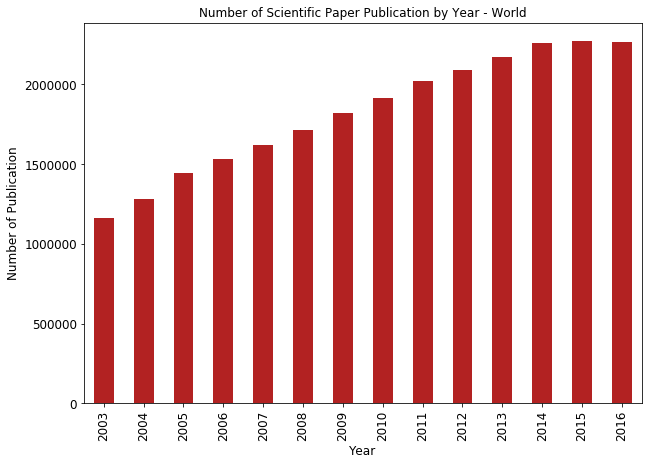

In [15]:
# plot world scientific paper publication, 2003 to 2016 (no data before 2003 )
Sci_world = Sci_clean.loc[:,'2003':'2016'].sum()

Sci_world.plot(kind='bar',figsize=(10,7), fontsize=12, color = 'firebrick')

plt.title('Number of Scientific Paper Publication by Year - World', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publication', fontsize=12)

plt.show()


The total number of publication in increasing from 2003 and plateaued after 2014.

### Top Scientific Research Countries 

In [16]:
# Sci top 10 countries, sort by 2016
Sci_clean.top = Sci_clean.sort_values('2016', ascending=False).drop('Code', axis=1).head(10)
Sci_clean.top

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



2003    2004    2005    2006    2007    2008    2009  \
Country                                                                      
China                86621  119754  164747  189759  215700  249972  290330   
United States       321765  347873  379701  383114  389451  391933  398871   
India                26797   28930   33215   38590   43624   48794   54667   
Germany              70447   74144   82968   84434   88424   91159   95033   
United Kingdom       74599   78314   84993   88060   91352   92000   94757   
Japan                97235  100403  109662  110502  108760  106897  108237   
France               51757   54775   59581   62448   64476   67209   69380   
Italy                41207   43636   47357   50159   53837   55940   58398   
Korea, Rep.          23201   27398   31646   36746   41521   44300   46020   
Russian Federation   32329   32149   33091   29368   30319   31854   32620   

                      2010    2011    2012    2013    2014    2015    2016  
Country                                                                     
China               316915  334045  332082  362972  393962  411268  426165  
United States       409853  424938  432311  435212  440229  429139  408985  
India                62790   75337   82182   88942  100574  106663  110319  
Germany              97179  100879  105373  105377  109262  105754  103121  
United Kingdom       95488   98479  101367  103051  102970  101407   97526  
Japan               108292  110570  109424  109257  106154   99812   96536  
France               70177   72035   74413   75266   75017   72224   69430  
Italy                58805   60842   65276   68768   70780   70814   69125  
Korea, Rep.          50935   54716   57373   59205   62691   64523   63063  
Russian Federation   33960   36157   36252   39714   44994   53060   59133

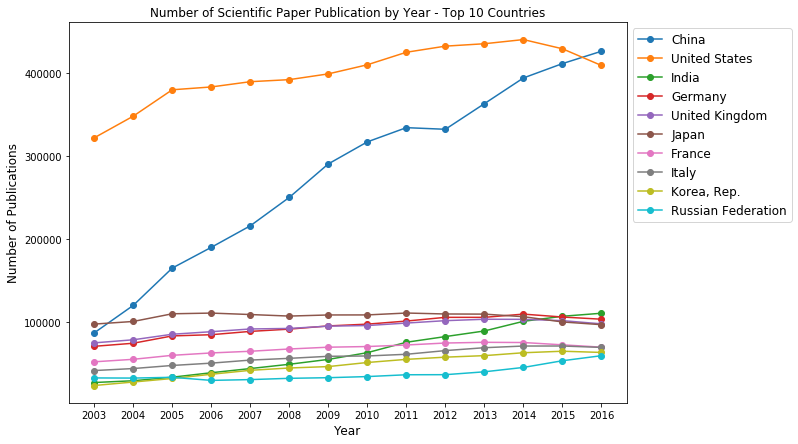

In [17]:
# plot number of publications by year

plt.figure(figsize=(10,7))

for i in Sci_clean.top.index:
    plt.plot(Sci_clean.top.loc[i,:], marker = 'o')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title('Number of Scientific Paper Publication by Year - Top 10 Countries', fontsize=12)

plt.show()


For USA, the number of publication showed a little increase then followed by a drop after 2014.  
China showed dramatic increase in publication numbers. India and Brazil also showed steady increase.  
Now, let's take a look at the details for individual year.

In [18]:
# for a given year and dataframe, get the top 10 countries 

def topten(year,data,total=10):
    df = data[str(year)]
    top = df.sort_values(ascending=False)
    top = top.reset_index().head(total)
    top.index = top.index + 1
    return top


In [19]:
# for a given year and dataframe, make a pie chart of the top 10 and the rest countries

def PiePlot(year, data):
    df = data[str(year)]
    top = df.sort_values(ascending=False)
    top = top.reset_index()
    top.index = top.index + 1
    others = top[10:].sum()[1]
    top = top[:10]
    top.loc[11] = ['All Other Countries', others]
    
    countryPlot = top[str(year)].plot.pie(subplots=True,
                                     autopct='%0.2f',
                                     fontsize=12,
                                     figsize=(10,10),
                                     legend=False,
                                     labels=top['Country'],
                                     shadow=False,
                                     explode=(0.15,0,0,0,0,0,0,0,0,0,0),
                                     startangle=90)
    plt.show()



In [20]:
topten(2003,Sci_clean)

Country    2003
1        United States  321765
2                Japan   97235
3                China   86621
4       United Kingdom   74599
5              Germany   70447
6               France   51757
7                Italy   41207
8               Canada   37695
9   Russian Federation   32329
10               Spain   28887

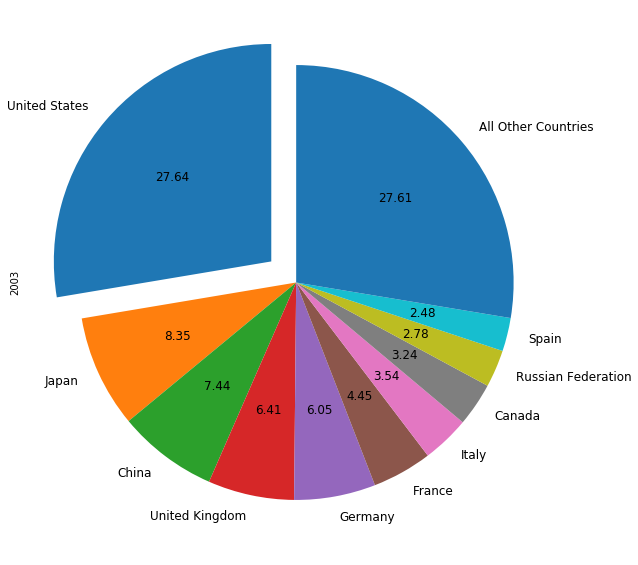

In [21]:
PiePlot(2003,Sci_clean)

In [22]:
topten(2016,Sci_clean)

Country    2016
1                China  426165
2        United States  408985
3                India  110319
4              Germany  103121
5       United Kingdom   97526
6                Japan   96536
7               France   69430
8                Italy   69125
9          Korea, Rep.   63063
10  Russian Federation   59133

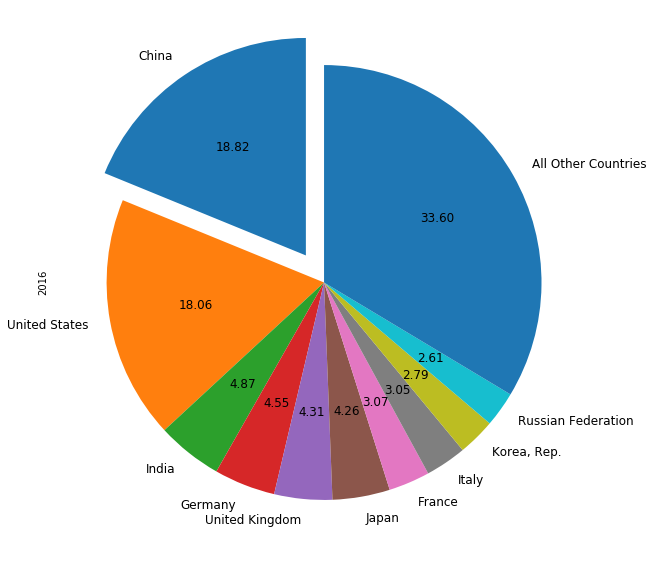

In [23]:
PiePlot(2016,Sci_clean)

From 2003 to 2016:    
USA have a dominating number of publications in 2003.   
China climbed from 3rd place to top rank, the number of publication is similar to USA in 2016.   
Japan's rank is 2nd then falling to 6th.   
Korea, Rep. is new to top10.   
Other than the top 10 countries, the rest countries also showed a higher share of total publication. It's a indication that all coutries are putting more efforts in scientific research.

### Change of Number of Publication of Top Countries in Absolute and Percentage

In [24]:
# absolute change
Sci_change = Sci_clean.top.diff(axis=1).fillna(value=0)

Sci_change

2003     2004     2005     2006     2007     2008  \
Country                                                                 
China                0.0  33133.0  44993.0  25012.0  25941.0  34272.0   
United States        0.0  26108.0  31828.0   3413.0   6337.0   2482.0   
India                0.0   2133.0   4285.0   5375.0   5034.0   5170.0   
Germany              0.0   3697.0   8824.0   1466.0   3990.0   2735.0   
United Kingdom       0.0   3715.0   6679.0   3067.0   3292.0    648.0   
Japan                0.0   3168.0   9259.0    840.0  -1742.0  -1863.0   
France               0.0   3018.0   4806.0   2867.0   2028.0   2733.0   
Italy                0.0   2429.0   3721.0   2802.0   3678.0   2103.0   
Korea, Rep.          0.0   4197.0   4248.0   5100.0   4775.0   2779.0   
Russian Federation   0.0   -180.0    942.0  -3723.0    951.0   1535.0   

                       2009     2010     2011    2012     2013     2014  \
Country                                                                   
China               40358.0  26585.0  17130.0 -1963.0  30890.0  30990.0   
United States        6938.0  10982.0  15085.0  7373.0   2901.0   5017.0   
India                5873.0   8123.0  12547.0  6845.0   6760.0  11632.0   
Germany              3874.0   2146.0   3700.0  4494.0      4.0   3885.0   
United Kingdom       2757.0    731.0   2991.0  2888.0   1684.0    -81.0   
Japan                1340.0     55.0   2278.0 -1146.0   -167.0  -3103.0   
France               2171.0    797.0   1858.0  2378.0    853.0   -249.0   
Italy                2458.0    407.0   2037.0  4434.0   3492.0   2012.0   
Korea, Rep.          1720.0   4915.0   3781.0  2657.0   1832.0   3486.0   
Russian Federation    766.0   1340.0   2197.0    95.0   3462.0   5280.0   

                       2015     2016  
Country                               
China               17306.0  14897.0  
United States      -11090.0 -20154.0  
India                6089.0   3656.0  
Germany             -3508.0  -2633.0  
United Kingdom      -1563.0  -3881.0  
Japan               -6342.0  -3276.0  
France              -2793.0  -2794.0  
Italy                  34.0  -1689.0  
Korea, Rep.          1832.0  -1460.0  
Russian Federation   8066.0   6073.0

In [25]:
# percentage change
Sci_pchange = (Sci_clean.top.pct_change(axis=1) * 100).fillna(value=0)

Sci_pchange

2003       2004       2005       2006       2007  \
Country                                                                
China                0.0  38.250540  37.571188  15.182067  13.670498   
United States        0.0   8.113996   9.149316   0.898865   1.654077   
India                0.0   7.959846  14.811614  16.182448  13.044830   
Germany              0.0   5.247917  11.901165   1.766946   4.725584   
United Kingdom       0.0   4.979960   8.528488   3.608532   3.738360   
Japan                0.0   3.258086   9.221836   0.765990  -1.576442   
France               0.0   5.831095   8.774076   4.811937   3.247502   
Italy                0.0   5.894630   8.527363   5.916760   7.332682   
Korea, Rep.          0.0  18.089738  15.504781  16.115781  12.994612   
Russian Federation   0.0  -0.556776   2.930107 -11.250793   3.238218   

                         2008       2009       2010       2011      2012  \
Country                                                                    
China               15.888734  16.145008   9.156822   5.405235 -0.587645   
United States        0.637307   1.770201   2.753271   3.680588  1.735077   
India               11.851275  12.036316  14.859056  19.982481  9.085841   
Germany              3.093052   4.249718   2.258163   3.807407  4.454842   
United Kingdom       0.709344   2.996739   0.771447   3.132331  2.932605   
Japan               -1.712946   1.253543   0.050814   2.103572 -1.036447   
France               4.238787   3.230222   1.148746   2.647591  3.301173   
Italy                3.906235   4.393994   0.696942   3.463991  7.287729   
Korea, Rep.          6.692999   3.882619  10.680139   7.423186  4.855984   
Russian Federation   5.062832   2.404722   4.107909   6.469376  0.262743   

                        2013       2014       2015       2016  
Country                                                        
China               9.301919   8.537849   4.392809   3.622212  
United States       0.671045   1.152772  -2.519143  -4.696380  
India               8.225646  13.078186   6.054249   3.427618  
Germany             0.003796   3.686763  -3.210631  -2.489740  
United Kingdom      1.661290  -0.078602  -1.517918  -3.827152  
Japan              -0.152617  -2.840093  -5.974339  -3.282170  
France              1.146305  -0.330827  -3.723156  -3.868520  
Italy               5.349592   2.925779   0.048036  -2.385122  
Korea, Rep.         3.193140   5.888016   2.922270  -2.262759  
Russian Federation  9.549818  13.295060  17.926835  11.445533

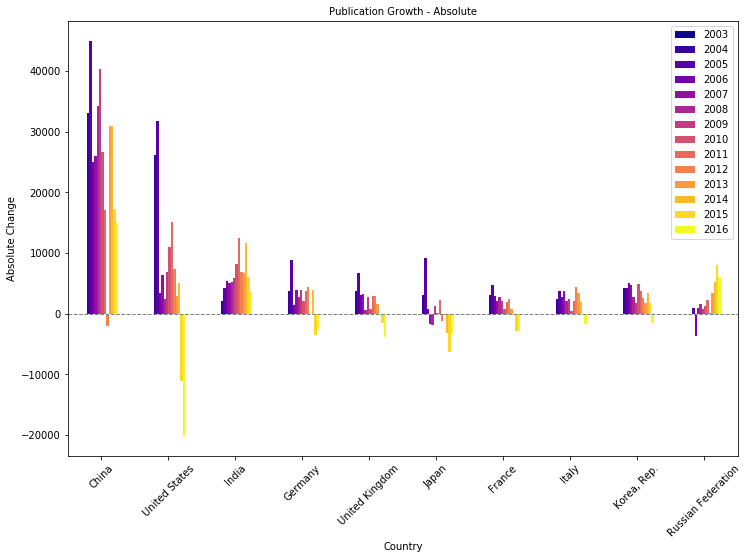

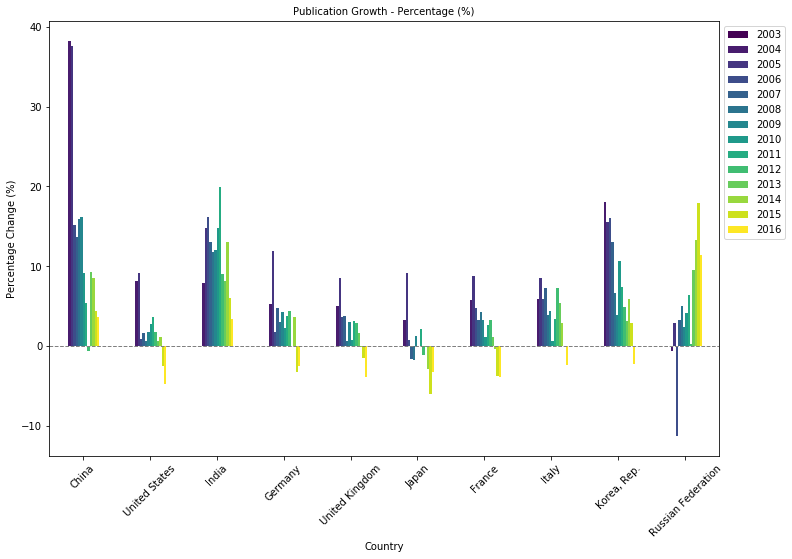

In [26]:
# make the absolute and percentage change plot

Sci_change.plot(kind='bar', colormap='plasma', figsize=(12,8), rot=45, fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Absolute Change', fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), fontsize=10)
plt.axhline(0, linestyle='dashed',linewidth=1, color='grey')
plt.title('Publication Growth - Absolute', fontsize=10)


Sci_pchange.plot(kind='bar',colormap= 'viridis', figsize=(12,8), rot=45, fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Percentage Change (%)', fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), fontsize=10)
plt.axhline(0, linestyle='dashed',linewidth=1, color='grey')
plt.title('Publication Growth - Percentage (%)', fontsize=10)

plt.show()

China and USA showed greatest growth in absolute number overall. However, there's a drop obersered for recent years for USA.  
Also, India and Korea, Rep. have steady increase.  

China showed fastest growing in percentage. Followed by India, Korea, Rep.and Russia.

### Research Expenditure Analysis

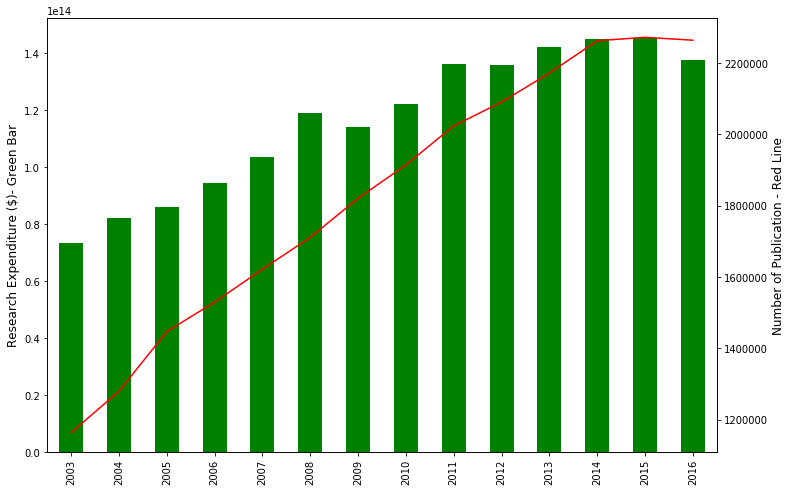

In [27]:
# global total expenditure comparing with publication
# bar-line plot, bar expenditure, line publication
fig, ax1 = plt.subplots(figsize=(12,8))
   
df1 = Exp.drop('Code', axis=1).sum()
df2 = Sci_world

ax1=df1.plot(kind='bar',width = 0.5, color = 'g')
ax2 = ax1.twinx()
ax2=df2.plot(color='r')

ax1.set_ylabel('Research Expenditure ($)- Green Bar', fontsize=12)
ax2.set_ylabel('Number of Publication - Red Line', fontsize=12)
   
plt.show()

The total expenditure keep increasing (with small fluctuations) from 2003 and reached stagnant after 2013.

The overall trend of publication and research expenditure coincides.  

In [28]:
# get top country index with top publication, find the data in Exp($)
Exp.top = Exp.loc[Sci_clean.top.index].drop('Code', axis=1)
Exp.top

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



2003          2004          2005          2006  \
Country                                                                      
China               1.860137e+12  2.375708e+12  2.989860e+12  3.766403e+12   
United States       2.938524e+13  3.056396e+13  3.281275e+13  3.533279e+13   
India               4.371092e+11  5.367523e+11  6.760795e+11  7.566567e+11   
Germany             6.155585e+12  6.824800e+12  6.931852e+12  7.374128e+12   
United Kingdom      3.248672e+12  3.707087e+12  3.942025e+12  4.269191e+12   
Japan               1.352791e+13  1.458759e+13  1.512691e+13  1.485257e+13   
France              3.885568e+12  4.414200e+12  4.489914e+12  4.742173e+12   
Italy               1.666937e+12  1.893841e+12  1.939904e+12  2.111565e+12   
Korea, Rep.         1.600245e+12  1.937045e+12  2.358661e+12  2.864055e+12   
Russian Federation  5.534402e+11  6.804552e+11  8.159474e+11  1.062136e+12   

                            2007          2008          2009          2010  \
Country                                                                      
China               4.877075e+12  6.642982e+12  8.493305e+12  1.043169e+13   
United States       3.803159e+13  4.072381e+13  4.064051e+13  4.100926e+13   
India               9.795547e+11  1.029563e+12  1.117988e+12  1.361955e+12   
Germany             8.415262e+12  9.745344e+12  9.318985e+12  9.272867e+12   
United Kingdom      5.001368e+12  4.713470e+12  4.029216e+12  4.073366e+12   
Japan               1.507918e+13  1.681241e+13  1.690469e+13  1.788166e+13   
France              5.367651e+12  6.004835e+12  5.942970e+12  5.747914e+12   
Italy               2.495398e+12  2.782020e+12  2.668649e+12  2.599180e+12   
Korea, Rep.         3.368430e+12  3.130361e+12  2.970288e+12  3.793469e+12   
Russian Federation  1.450615e+12  1.734505e+12  1.530653e+12  1.723462e+12   

                            2011          2012          2013          2014  \
Country                                                                      
China               1.344424e+13  1.631486e+13  1.912039e+13  2.118634e+13   
United States       4.297922e+13  4.343486e+13  4.548205e+13  4.774050e+13   
India               1.515410e+12  0.000000e+00  0.000000e+00  0.000000e+00   
Germany             1.050510e+13  1.016461e+13  1.058603e+13  1.117729e+13   
United Kingdom      4.386793e+12  4.266045e+12  4.514125e+12  5.035064e+12   
Japan               1.997954e+13  1.990661e+13  1.709100e+13  1.649820e+13   
France              6.268315e+12  5.982434e+12  6.294200e+12  6.497804e+12   
Italy               2.753950e+12  2.634289e+12  2.786001e+12  2.889799e+12   
Korea, Rep.         4.501555e+12  4.922459e+12  5.416341e+12  6.052844e+12   
Russian Federation  2.077533e+12  2.269381e+12  2.355107e+12  2.208346e+12   

                            2015          2016  
Country                                         
China               2.275371e+13  2.357640e+13  
United States       4.965855e+13  5.110891e+13  
India               1.311135e+12  0.000000e+00  
Germany             9.846489e+12  1.022295e+13  
United Kingdom      4.831743e+12  4.480891e+12  
Japan               1.444383e+13  1.557338e+13  
France              5.538048e+12  5.541030e+12  
Italy               2.458060e+12  2.391130e+12  
Korea, Rep.         5.831144e+12  5.996944e+12  
Russian Federation  1.503777e+12  1.409218e+12

In [29]:
# There're a few 0 in the dataframe (India), let's fill it with the value of previous column
Exp.fill= Exp.replace(0, np.nan).ffill(axis=1)
Exp.top.fill = Exp.top.replace(0, np.nan).ffill(axis=1)
Exp.top.fill

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



2003          2004          2005          2006  \
Country                                                                      
China               1.860137e+12  2.375708e+12  2.989860e+12  3.766403e+12   
United States       2.938524e+13  3.056396e+13  3.281275e+13  3.533279e+13   
India               4.371092e+11  5.367523e+11  6.760795e+11  7.566567e+11   
Germany             6.155585e+12  6.824800e+12  6.931852e+12  7.374128e+12   
United Kingdom      3.248672e+12  3.707087e+12  3.942025e+12  4.269191e+12   
Japan               1.352791e+13  1.458759e+13  1.512691e+13  1.485257e+13   
France              3.885568e+12  4.414200e+12  4.489914e+12  4.742173e+12   
Italy               1.666937e+12  1.893841e+12  1.939904e+12  2.111565e+12   
Korea, Rep.         1.600245e+12  1.937045e+12  2.358661e+12  2.864055e+12   
Russian Federation  5.534402e+11  6.804552e+11  8.159474e+11  1.062136e+12   

                            2007          2008          2009          2010  \
Country                                                                      
China               4.877075e+12  6.642982e+12  8.493305e+12  1.043169e+13   
United States       3.803159e+13  4.072381e+13  4.064051e+13  4.100926e+13   
India               9.795547e+11  1.029563e+12  1.117988e+12  1.361955e+12   
Germany             8.415262e+12  9.745344e+12  9.318985e+12  9.272867e+12   
United Kingdom      5.001368e+12  4.713470e+12  4.029216e+12  4.073366e+12   
Japan               1.507918e+13  1.681241e+13  1.690469e+13  1.788166e+13   
France              5.367651e+12  6.004835e+12  5.942970e+12  5.747914e+12   
Italy               2.495398e+12  2.782020e+12  2.668649e+12  2.599180e+12   
Korea, Rep.         3.368430e+12  3.130361e+12  2.970288e+12  3.793469e+12   
Russian Federation  1.450615e+12  1.734505e+12  1.530653e+12  1.723462e+12   

                            2011          2012          2013          2014  \
Country                                                                      
China               1.344424e+13  1.631486e+13  1.912039e+13  2.118634e+13   
United States       4.297922e+13  4.343486e+13  4.548205e+13  4.774050e+13   
India               1.515410e+12  1.515410e+12  1.515410e+12  1.515410e+12   
Germany             1.050510e+13  1.016461e+13  1.058603e+13  1.117729e+13   
United Kingdom      4.386793e+12  4.266045e+12  4.514125e+12  5.035064e+12   
Japan               1.997954e+13  1.990661e+13  1.709100e+13  1.649820e+13   
France              6.268315e+12  5.982434e+12  6.294200e+12  6.497804e+12   
Italy               2.753950e+12  2.634289e+12  2.786001e+12  2.889799e+12   
Korea, Rep.         4.501555e+12  4.922459e+12  5.416341e+12  6.052844e+12   
Russian Federation  2.077533e+12  2.269381e+12  2.355107e+12  2.208346e+12   

                            2015          2016  
Country                                         
China               2.275371e+13  2.357640e+13  
United States       4.965855e+13  5.110891e+13  
India               1.311135e+12  1.311135e+12  
Germany             9.846489e+12  1.022295e+13  
United Kingdom      4.831743e+12  4.480891e+12  
Japan               1.444383e+13  1.557338e+13  
France              5.538048e+12  5.541030e+12  
Italy               2.458060e+12  2.391130e+12  
Korea, Rep.         5.831144e+12  5.996944e+12  
Russian Federation  1.503777e+12  1.409218e+12

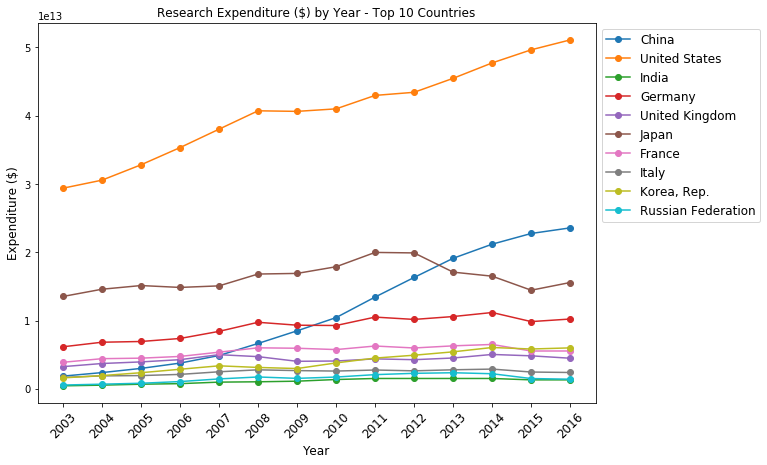

In [30]:
# plot the expenditure for top countries by year

plt.figure(figsize=(10,7))

for i in Exp.top.fill.index:
    plt.plot(Exp.top.fill.loc[i,:], marker = 'o')

plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Expenditure ($)', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title('Research Expenditure ($) by Year - Top 10 Countries', fontsize=12)

plt.show()


In [31]:
# Expenditure (% of GDP) of top countries,ffill India
ExpPercent.top = ExpPercent_clean.loc[Sci_clean.top.index].drop('Code', axis=1)
ExpPercent.top.fill = ExpPercent.top.replace(0, np.nan).ffill(axis=1)
ExpPercent.top.fill

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



2003     2004     2005     2006     2007     2008  \
Country                                                                    
China               1.12037  1.21498  1.30792  1.36854  1.37298  1.44469   
United States       2.55287  2.48995  2.50599  2.55002  2.62692  2.76683   
India               0.72901  0.76713  0.83580  0.82217  0.81554  0.86740   
Germany             2.45660  2.42079  2.42253  2.45604  2.44633  2.59712   
United Kingdom      1.59374  1.54555  1.56386  1.58552  1.62680  1.63064   
Japan               3.04295  3.02952  3.18099  3.27844  3.33960  3.33718   
France              2.11117  2.08636  2.04447  2.04528  2.02003  2.05759   
Italy               1.06198  1.05312  1.04709  1.08696  1.13270  1.16367   
Korea, Rep.         2.35150  2.53248  2.62617  2.83066  3.00035  3.12343   
Russian Federation  1.28603  1.15133  1.06797  1.07294  1.11611  1.04435   

                       2009     2010     2011     2012     2013     2014  \
Country                                                                    
China               1.66211  1.70994  1.77539  1.90582  1.99021  2.02114   
United States       2.81859  2.74046  2.76965  2.68859  2.72486  2.73936   
India               0.84444  0.82213  0.83125  0.83125  0.83125  0.83125   
Germany             2.72644  2.71367  2.79562  2.86813  2.82105  2.87289   
United Kingdom      1.69094  1.66861  1.67454  1.60252  1.64760  1.66568   
Japan               3.23140  3.13708  3.24477  3.20908  3.31496  3.40140   
France              2.20910  2.17509  2.19064  2.22907  2.23907  2.27820   
Italy               1.22126  1.22311  1.20984  1.27087  1.30768  1.34301   
Korea, Rep.         3.29324  3.46594  3.74361  4.02554  4.14853  4.28874   
Russian Federation  1.25192  1.13020  1.01261  1.02675  1.02524  1.07011   

                       2015     2016  
Country                               
China               2.05643  2.10673  
United States       2.74043  2.74418  
India               0.62364  0.62364  
Germany             2.91695  2.93949  
United Kingdom      1.67445  1.69036  
Japan               3.28644  3.14660  
France              2.27136  2.24776  
Italy               1.34110  1.28598  
Korea, Rep.         4.21702  4.23871  
Russian Federation  1.09893  1.09690

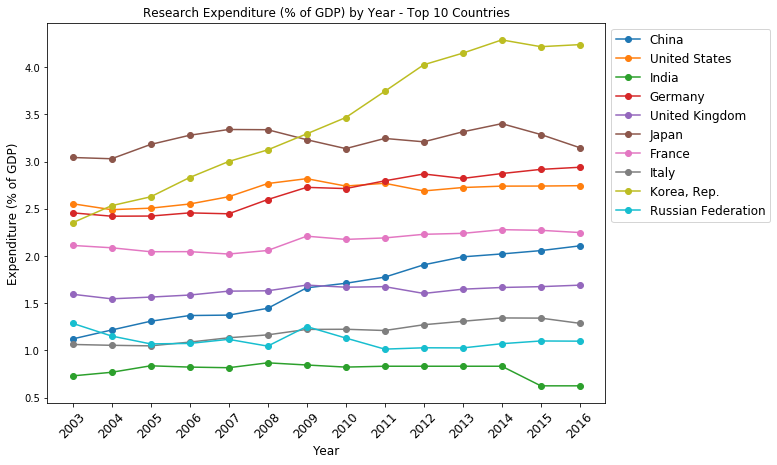

In [32]:
# plot the expenditure (% of GDP) for top countries by year

plt.figure(figsize=(10,7))

for i in ExpPercent.top.fill.index:
    plt.plot(ExpPercent.top.fill.loc[i,:], marker = 'o')

plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Expenditure (% of GDP)', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title('Research Expenditure (% of GDP) by Year - Top 10 Countries', fontsize=12)

plt.show()

In [33]:
topten(2003,Exp)

Country          2003
1    United States  2.938524e+13
2            Japan  1.352791e+13
3          Germany  6.155585e+12
4           France  3.885568e+12
5   United Kingdom  3.248672e+12
6            China  1.860137e+12
7           Canada  1.762256e+12
8            Italy  1.666937e+12
9      Korea, Rep.  1.600245e+12
10          Sweden  1.196753e+12

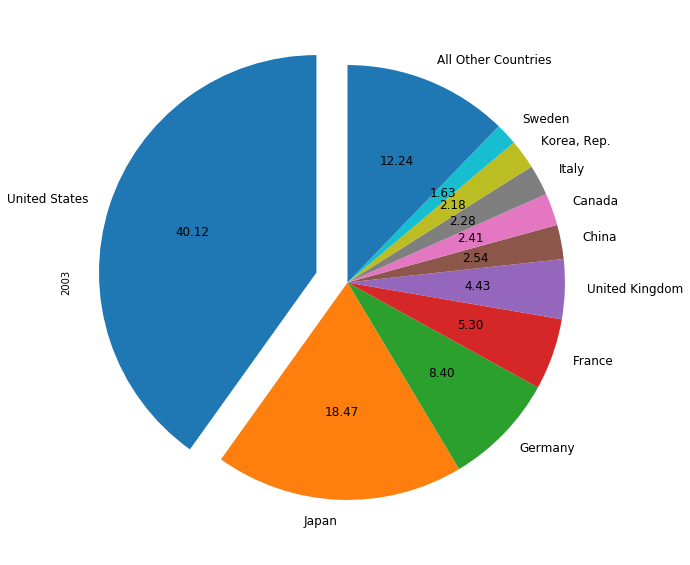

In [34]:
PiePlot(2003,Exp)

In [35]:
topten(2016,Exp)

Country          2016
1    United States  5.110891e+13
2            China  2.357640e+13
3            Japan  1.557338e+13
4          Germany  1.022295e+13
5      Korea, Rep.  5.996944e+12
6           France  5.541030e+12
7   United Kingdom  4.480891e+12
8           Canada  2.473154e+12
9            Italy  2.391130e+12
10          Sweden  1.674516e+12

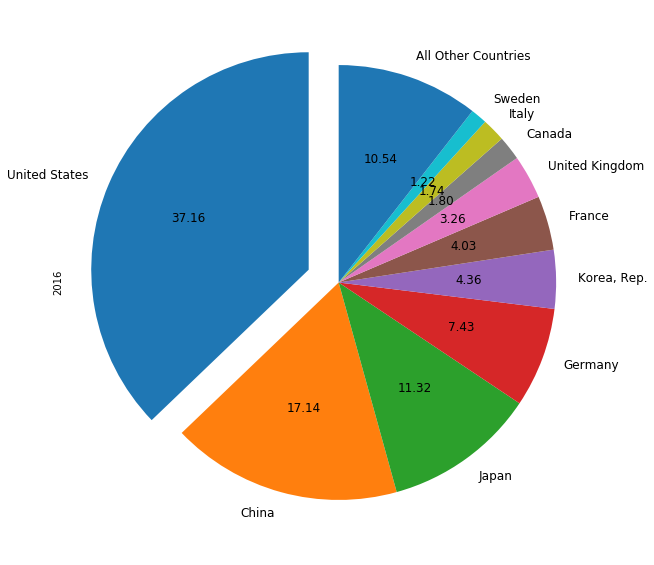

In [36]:
PiePlot(2016,Exp)

Both USA and China raised their research expenditure in terms of the absolute amount.   
Interestingly, the growth rate (slope) of this two countries coincides with each other.    
Korea showed steady increase.  
The rest countries don't have extraordinary change in expenditure. 
USA have an dominating research expenditure percentage.

Note: India has few missing value because of the data set, the value is filled by previous column.

**Japan** is maintaining a very high expenditure % of GDP among all the countries, up to 3%.    
Followed by USA and Gemany around 2.5-2.8%.  
**Korea** significantly raised the expenditure % to more than 4%.  
China also increased the percentage from 1 to 2 %.   

 
### Correlation between Publication and Research Expenditure

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

divide by zero encountered in log

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in log



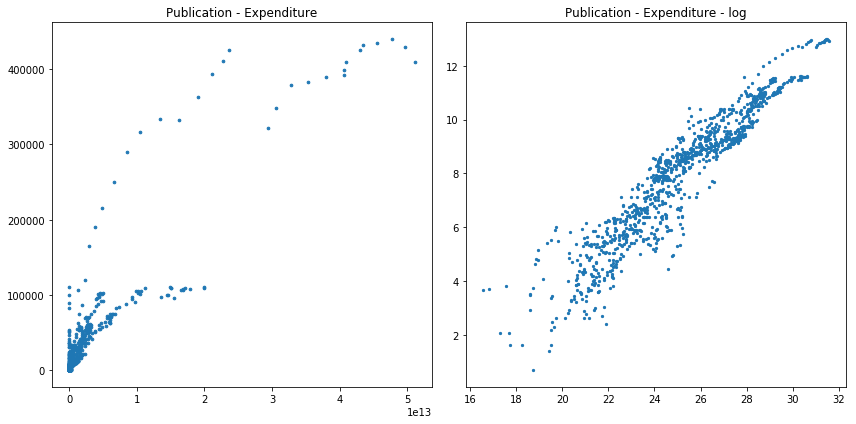

In [37]:
# scatter plot of Expenditure vs publications
# scatterf plot of log number

fig, ax = plt.subplots(1,2,figsize=(12,6))

x1=Exp.drop('Code', axis=1)
y1=Sci_clean.drop('Code', axis=1)

x2=np.log(Exp.drop('Code', axis=1))
y2=np.log(Sci_clean.drop('Code', axis=1))

plt.subplot(1,2,1)
plt.scatter(x1,y1, s=7)
plt.title('Publication - Expenditure')

plt.subplot(1,2,2)
plt.scatter(x2,y2, s=5)
plt.title('Publication - Expenditure - log')

plt.tight_layout()
plt.show()

Obviously, a positive correlation is observed that a higher research expenditure would lead to more publications.  

For the actually number plot, we can see the data points are splitting apart, it will be interesting to further explore the 'productivity'.  

For the log plot, a pretty clear linear relation is observed.  
Also, for higher expenditure, the data points are more concentrated, while for lower expenditure, data points are more scattered.  

Overall, countries with higher expenditure will have more publications.  

#### Most Productive Countries

In [38]:
# calcultate publication/expenditure ratio, higher ratio indicates the country is more productive
# India have missing value, serveal year will be inf after calculation, replace using ffill
ratio = Sci_clean.top/Exp.top
ratio.fill = ratio.replace(np.inf, np.nan).ffill(axis=1)
ratio.fill

C:\Users\firenh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



2003          2004          2005          2006  \
Country                                                                      
China               4.656700e-08  5.040772e-08  5.510190e-08  5.038203e-08   
United States       1.094988e-08  1.138181e-08  1.157175e-08  1.084302e-08   
India               6.130505e-08  5.389823e-08  4.912884e-08  5.100067e-08   
Germany             1.144440e-08  1.086391e-08  1.196910e-08  1.145003e-08   
United Kingdom      2.296292e-08  2.112548e-08  2.156075e-08  2.062686e-08   
Japan               7.187730e-09  6.882768e-09  7.249463e-09  7.439925e-09   
France              1.332032e-08  1.240882e-08  1.326996e-08  1.316865e-08   
Italy               2.472020e-08  2.304100e-08  2.441203e-08  2.375442e-08   
Korea, Rep.         1.449841e-08  1.414423e-08  1.341694e-08  1.283006e-08   
Russian Federation  5.841463e-08  4.724631e-08  4.055531e-08  2.764994e-08   

                            2007          2008          2009          2010  \
Country                                                                      
China               4.422733e-08  3.762948e-08  3.418340e-08  3.038001e-08   
United States       1.024020e-08  9.624172e-09  9.814615e-09  9.994157e-09   
India               4.453452e-08  4.739293e-08  4.889766e-08  4.610286e-08   
Germany             1.050758e-08  9.354108e-09  1.019778e-08  1.047993e-08   
United Kingdom      1.826540e-08  1.951853e-08  2.351748e-08  2.344204e-08   
Japan               7.212595e-09  6.358221e-09  6.402779e-09  6.056036e-09   
France              1.201196e-08  1.119248e-08  1.167430e-08  1.220913e-08   
Italy               2.157451e-08  2.010769e-08  2.188299e-08  2.262444e-08   
Korea, Rep.         1.232651e-08  1.415172e-08  1.549345e-08  1.342702e-08   
Russian Federation  2.090080e-08  1.836489e-08  2.131117e-08  1.970453e-08   

                            2011          2012          2013          2014  \
Country                                                                      
China               2.484671e-08  2.035457e-08  1.898350e-08  1.859509e-08   
United States       9.887056e-09  9.953089e-09  9.568875e-09  9.221291e-09   
India               4.971393e-08  4.971393e-08  4.971393e-08  4.971393e-08   
Germany             9.602863e-09  1.036666e-08  9.954347e-09  9.775361e-09   
United Kingdom      2.244897e-08  2.376135e-08  2.282856e-08  2.045058e-08   
Japan               5.534161e-09  5.496868e-09  6.392664e-09  6.434279e-09   
France              1.149192e-08  1.243858e-08  1.195799e-08  1.154498e-08   
Italy               2.209263e-08  2.477936e-08  2.468341e-08  2.449306e-08   
Korea, Rep.         1.215491e-08  1.165535e-08  1.093081e-08  1.035728e-08   
Russian Federation  1.740381e-08  1.597440e-08  1.686293e-08  2.037452e-08   

                            2015          2016  
Country                                         
China               1.807476e-08  1.807592e-08  
United States       8.641795e-09  8.002225e-09  
India               8.135165e-08  8.135165e-08  
Germany             1.074028e-08  1.008721e-08  
United Kingdom      2.098766e-08  2.176487e-08  
Japan               6.910355e-09  6.198781e-09  
France              1.304142e-08  1.253016e-08  
Italy               2.880890e-08  2.890892e-08  
Korea, Rep.         1.106524e-08  1.051586e-08  
Russian Federation  3.528450e-08  4.196158e-08

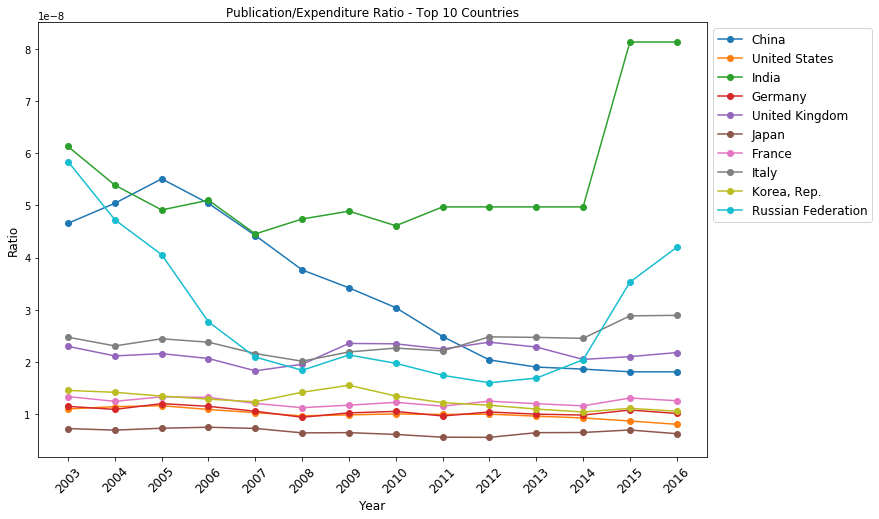

In [39]:
# plot the ratio
plt.figure(figsize=(12,8))

for i in ratio.fill.index:
    plt.plot(ratio.fill.loc[i,:], marker = 'o')

plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title('Publication/Expenditure Ratio - Top 10 Countries', fontsize=12)

plt.show()

India showed highest productivity overall.  
China have a very high productivity ratio at 2003 to 2005 then decreased and stablized, still among top 5.  
Russia showed a "U" shape curve.  
The rest countries showed similar ratio. 

We can see that, the developing countries showed a great rise in publication output. Productivity is one aspect of scientific research, on the other hand, developed countries probably are more dominating in citations.


Note: India has few missing value because of the data set, the value is filled by previous column. 

### Summary

* From 2003 to 2016, the number of global publication keep increasing then plateaued after 2014.  
* USA was the only giant in publication in 2003, while in 2016, China climbed up to top and these two countries became the flagships.  
* USA has an dominating expenditure in scientific research
* Japan, USA and Germany are maintaining a high research expenditure % of GDP (2.5-3%).
* Korea dramatically increased their expenditure % ( >4% in 2016) and became top10.
* Positive correlation is observed for publication/expenditure, but indicating differences in 'productivity'
* India, Russia and China are the most 'productive' countries
 

### References


* Jeff Tollefson. "China declared world’s largest producer of scientific articles", Nature, Volume 553, Issue 7689, pp. 390 (2018). DOI: 10.1038/d41586-018-00927-4
* Lee-Roy Chetty. 2012. "The Role of Science and Technology in the Developing World in the 21st Century", URL: https://ieet.org/index.php/IEET2/more/chetty20121003
* Karen E. White, Carol Robbins, Beethika Khan, and Christina Freyman. 2017. "Science and Engineering Publication Output Trends: 2014 Shows Rise of Developing Country Output while Developed Countries Dominate Highly Cited Publications", URL: https://www.nsf.gov/statistics/2018/nsf18300/



### Project 3 Complete, thank you!